In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from aging.behavior.syllables import relabel_by_usage
from aging.plotting import format_plots, PlotConfig, save_factory, figure, legend

In [2]:
format_plots()
c = PlotConfig()
saver = save_factory(c.save_path / "size-across-age", tight_layout=False)

In [3]:
def age_map(string) -> int:
    '''returns age in weeks'''
    if '3m' in string:
        return 3 * 30 / 7
    if '6m' in string:
        return 6 * 30 / 7
    if '9m' in string:
        return 9 * 30 / 7
    if '12m' in string:
        return 12 * 30 / 7
    if '18m' in string:
        return 18 * 30 / 7
    if '22m' in string:
        return 22 * 30 / 7
    if '3w' in string:
        return 3
    if '5w' in string:
        return 5
    if '7w' in string:
        return 7
    if '9w' in string:
        return 9

In [4]:
df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_03/ontogeny_males_syllable_df.parquet')
df, usage_map = relabel_by_usage(df)
df['age'] = df['age'].map(age_map).astype('int')

In [5]:
scalars = df.groupby(['age', 'uuid'], sort=False).mean(numeric_only=True).drop(index=[94, 38], level=0).reset_index()
scalars = scalars[scalars['velocity_2d_mm'] < 5]
scalars['velocity_3d_mm'] *= 30

In [6]:
scalars

,age,uuid,syllables,timestamps,area_mm,centroid_x_mm,centroid_y_mm,height_ave_mm,length_mm,velocity_2d_mm,velocity_3d_mm,width_mm,angle,velocity_theta,recon_width,recon_length,recon_height,recon_area,onsets,relabeled_syllables
0,77,0503a98f-a591-4493-af78-c10cc7e6369a,47.940650,899.451294,1326.758545,-213.413834,-97.239510,34.590946,67.681976,2.220522,73.406570,38.746204,3.096732,-0.015233,30.957970,60.318233,33.345936,979.055638,0.057775,18.041043
1,9,06192b00-8100-4112-bb3b-26285f40648b,48.940446,899.257385,792.095276,-228.963974,-112.993942,28.844183,52.886078,1.715492,59.276642,29.167072,2.405792,0.011650,30.936521,59.664031,35.260172,970.808330,0.047562,25.162240
2,3,063d2dfb-e67f-46f9-b852-f86e7de2c000,48.965253,899.393555,533.479553,-202.991745,-102.206047,21.281435,43.649544,1.773501,61.366997,24.075829,0.153931,-0.029029,31.527437,60.083167,34.997340,974.623804,0.050166,25.340301
3,5,06ecc6c9-5082-4e2b-ae77-79a674745d3b,51.376457,899.397095,723.722473,-221.564102,-94.096771,26.127630,51.236893,1.996010,68.669289,27.408409,1.366452,0.001642,30.763391,59.452828,34.887825,962.044795,0.053168,23.615815
4,25,08561952-5528-421c-bb1a-3f8ed3ec9790,50.821893,899.353455,1173.049805,-214.503555,-121.718483,34.692760,66.462730,1.901277,63.991844,34.614243,-3.702685,0.004594,30.761286,60.302921,34.220508,972.250050,0.056503,18.614191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,7,fd1b894b-c225-4929-bb2a-00e487a13b78,50.440001,899.482849,856.563721,-224.355911,-135.011887,31.538597,56.339352,2.451551,85.610222,30.337950,2.933018,-0.010532,31.711341,60.963001,34.500763,986.715253,0.063352,19.686388
161,25,fe5f34d6-08a4-4d41-9a7c-eb73a91b4180,52.414037,899.500000,1072.502197,-189.457428,-140.481598,33.671837,67.798820,2.435044,85.501656,31.757076,4.904906,0.020619,31.231146,62.937833,33.720869,1004.073897,0.066184,15.461303
162,9,fef8b279-5b66-438d-926d-6214f642e124,52.936842,899.615845,933.047791,-218.091827,-136.561707,28.380775,60.465446,2.246108,74.270645,31.064135,9.940375,0.020267,31.740220,62.258892,34.301255,1007.614858,0.056266,21.018971
163,12,ff62fddf-fdc8-490d-9a07-ae1b8797b144,52.361140,899.449585,909.071655,-202.571625,-118.649338,32.408054,60.938183,1.752648,60.453243,29.059763,-8.104790,0.042048,30.470138,60.838687,34.821351,972.572603,0.059091,17.192058


In [7]:
scalar_keys = ['area_mm', 'width_mm', 'height_ave_mm', 'length_mm', 'velocity_2d_mm', 'recon_area', 'recon_width', 'recon_length', 'recon_height']

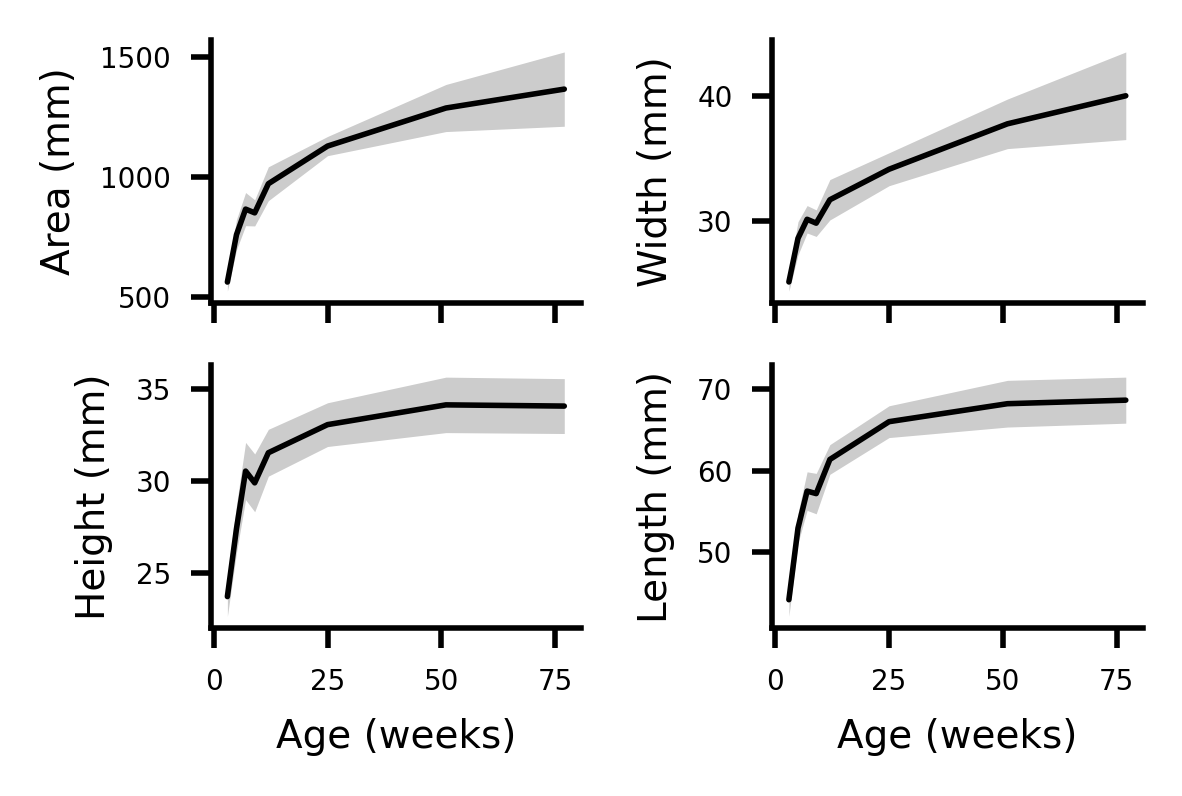

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(3, 2), sharex=True)

for key, a in zip(scalar_keys, ax.flat):
    a = sns.lineplot(data=scalars, x='age', y=key, color='k', err_kws=dict(lw=0), ax=a, errorbar=('sd'))
    a.set(ylabel=key.split('_')[0].capitalize() + ' (mm)', xlabel='Age (weeks)')
sns.despine()
saver(fig, 'scalars-vs-age', tight_layout=True);

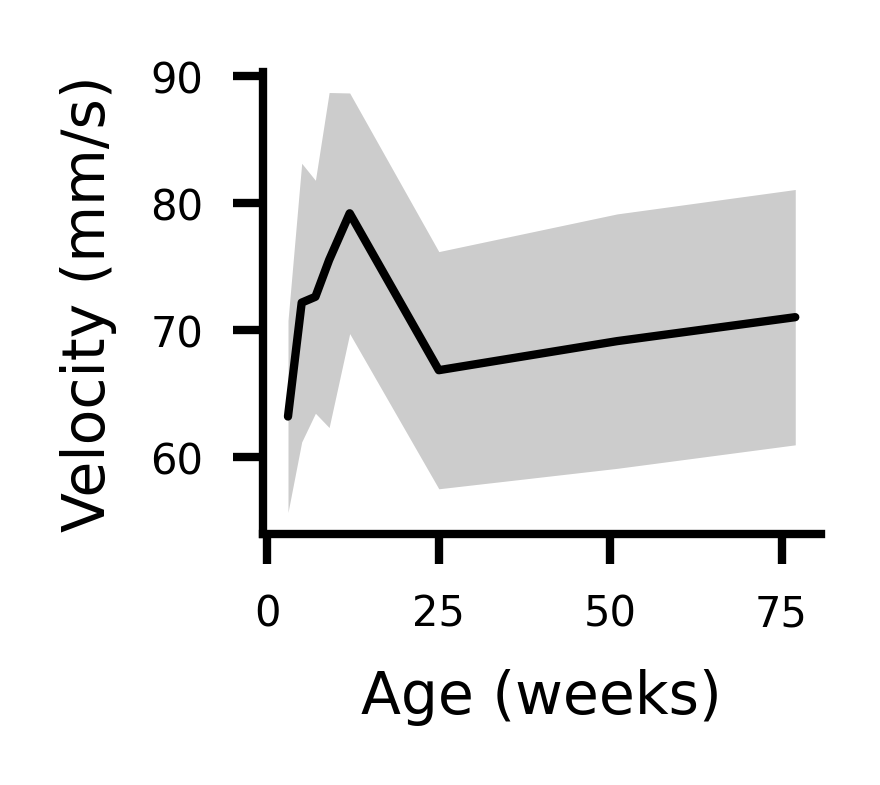

In [9]:
fig = figure(1.2, 1)
ax = sns.lineplot(data=scalars, x='age', y='velocity_3d_mm', err_kws=dict(lw=0), errorbar='sd', color='k')
ax.set(ylabel='Velocity (mm/s)', xlabel='Age (weeks)')
sns.despine()
saver(fig, 'velocity-vs-age');

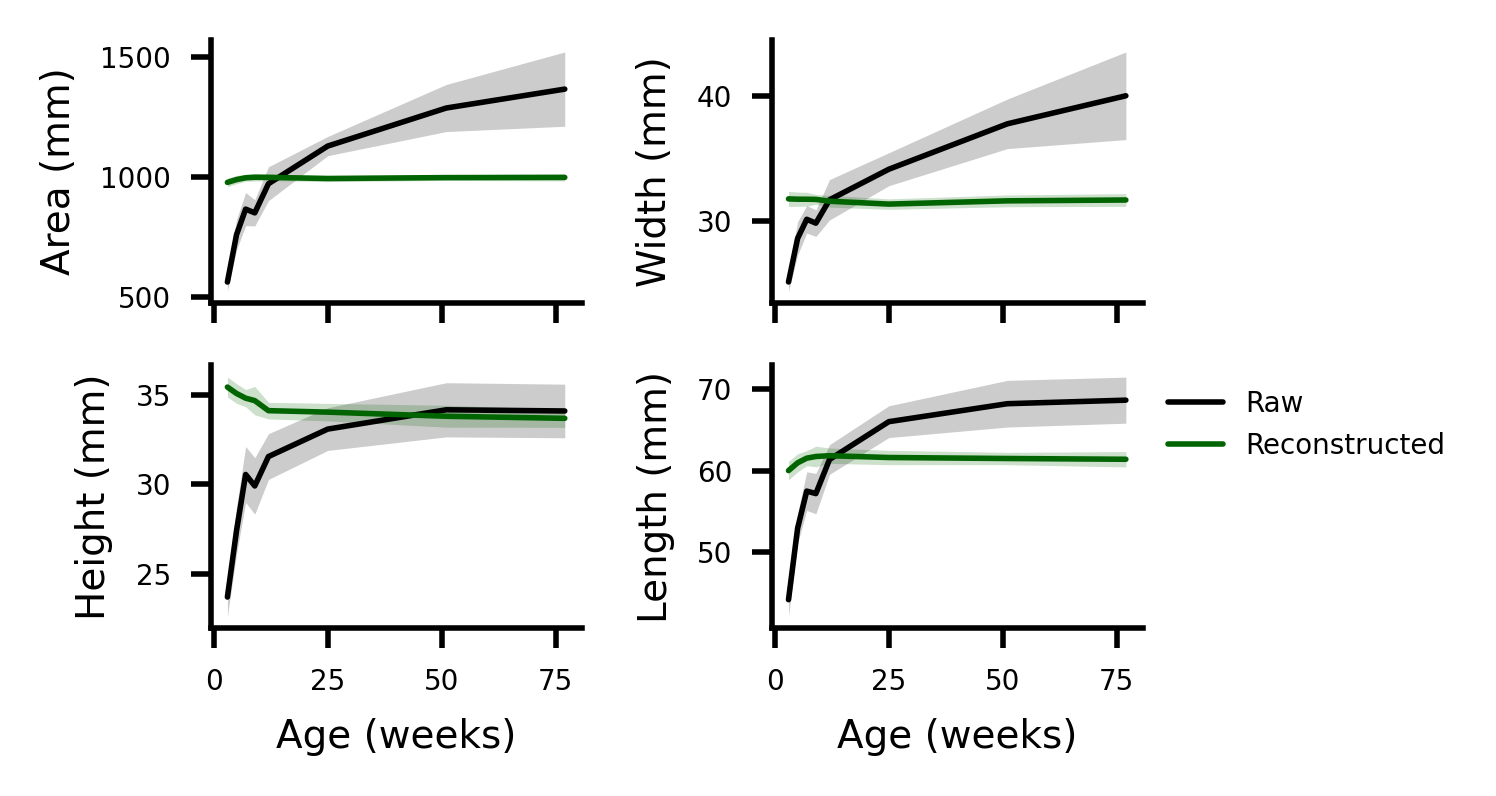

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(3.75, 2), sharex=True)

for key, a in zip(scalar_keys, ax.flat):
    a = sns.lineplot(
        data=scalars,
        x="age",
        y=key,
        color="k",
        err_kws=dict(lw=0),
        ax=a,
        errorbar=("sd"),
        label="Raw",
    )
    a = sns.lineplot(
        data=scalars,
        x="age",
        y=f'recon_{key.split("_")[0]}',
        color="darkgreen",
        err_kws=dict(lw=0),
        errorbar="sd",
        ax=a,
        label="Reconstructed",
    )
    a.legend_.remove()
    a.set(ylabel=key.split("_")[0].capitalize() + " (mm)", xlabel="Age (weeks)")
legend(a)
sns.despine()
saver(fig, "scalars-vs-age-with-recon", tight_layout=True);